---------------------
### Model saving and loading
--------------------

**About the dataset**
The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository https://www.kaggle.com/uciml/autompg-dataset

(a) Origin: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. 

The dataset was used in the 1983 American Statistical Association Exposition.

Attribute Information:

|column name | type of column|
|------------|---------------|
|`mpg`: |continuous|
|`cylinders`: |multi-valued discrete|
|`displacement`: |continuous|
|`horsepower`: |continuous|
|`weight`: |continuous|
|`acceleration`: |continuous|
|model year: |multi-valued discrete|
|origin: |multi-valued discrete|
|car name: |string (unique for each instance)|

Missing Attribute Values: horsepower has 6 missing values

In [1]:
import pandas as pd
import numpy as np

# import the ML algorithm
from sklearn.linear_model import LinearRegression

In [2]:
location = "https://github.com/gridflowai/gridflowAI-datasets-icons/raw/master/AI-DATASETS/01-MISC/auto-mpg.csv"

In [3]:
# load the training data from glass data set
df_training = pd.read_csv(location)
df_training

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [8]:
df_training.drop(['car name'], axis=1, inplace=True)

In [9]:
df_training

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [10]:
# check the shape of the DataFrame (rows, columns)
df_training.shape

(398, 8)

In [8]:
df_training.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


check for datatypes
- look for any string/char (OBJECT)
    - ML does not accept the OBJECT columns
        - OBJECT -> numeric (ENCODING)

In [11]:
df_training.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [12]:
np.unique(df_training['horsepower'])

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

In [13]:
df_training[df_training['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


#### What do we do with the "?" in the horsepower column?

1. drop the rows which have the "?" in the horsepower column

2. replace the "?" in the horsepower column

    - average value 
    - mean value
    - fixed value
    - predict for each of "?" (using KNN) - ADVANCE OPTION

##### option 1 : drop the rows which have the "?" in the horsepower column

In [14]:
# get the indexes of the rows where horsepower = '?'
# drop the rows (above indexes)
df_training[df_training['horsepower'] == '?'].index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

drop the indexes which have horsepower='?'

In [15]:
df_training.drop(df_training[df_training['horsepower'] == '?'].index, axis= 0, inplace = True)

In [16]:
df_training.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

convert the datatype of `horsepower` col to float/numeric

In [17]:
df_training['horsepower'] = df_training['horsepower'].astype('float64')

In [18]:
df_training.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [19]:
import seaborn as sns

#### 1. check for linearity of the data

- Column X must have linear pattern with the y column
    - X = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin']
    - y = 'horsepower'

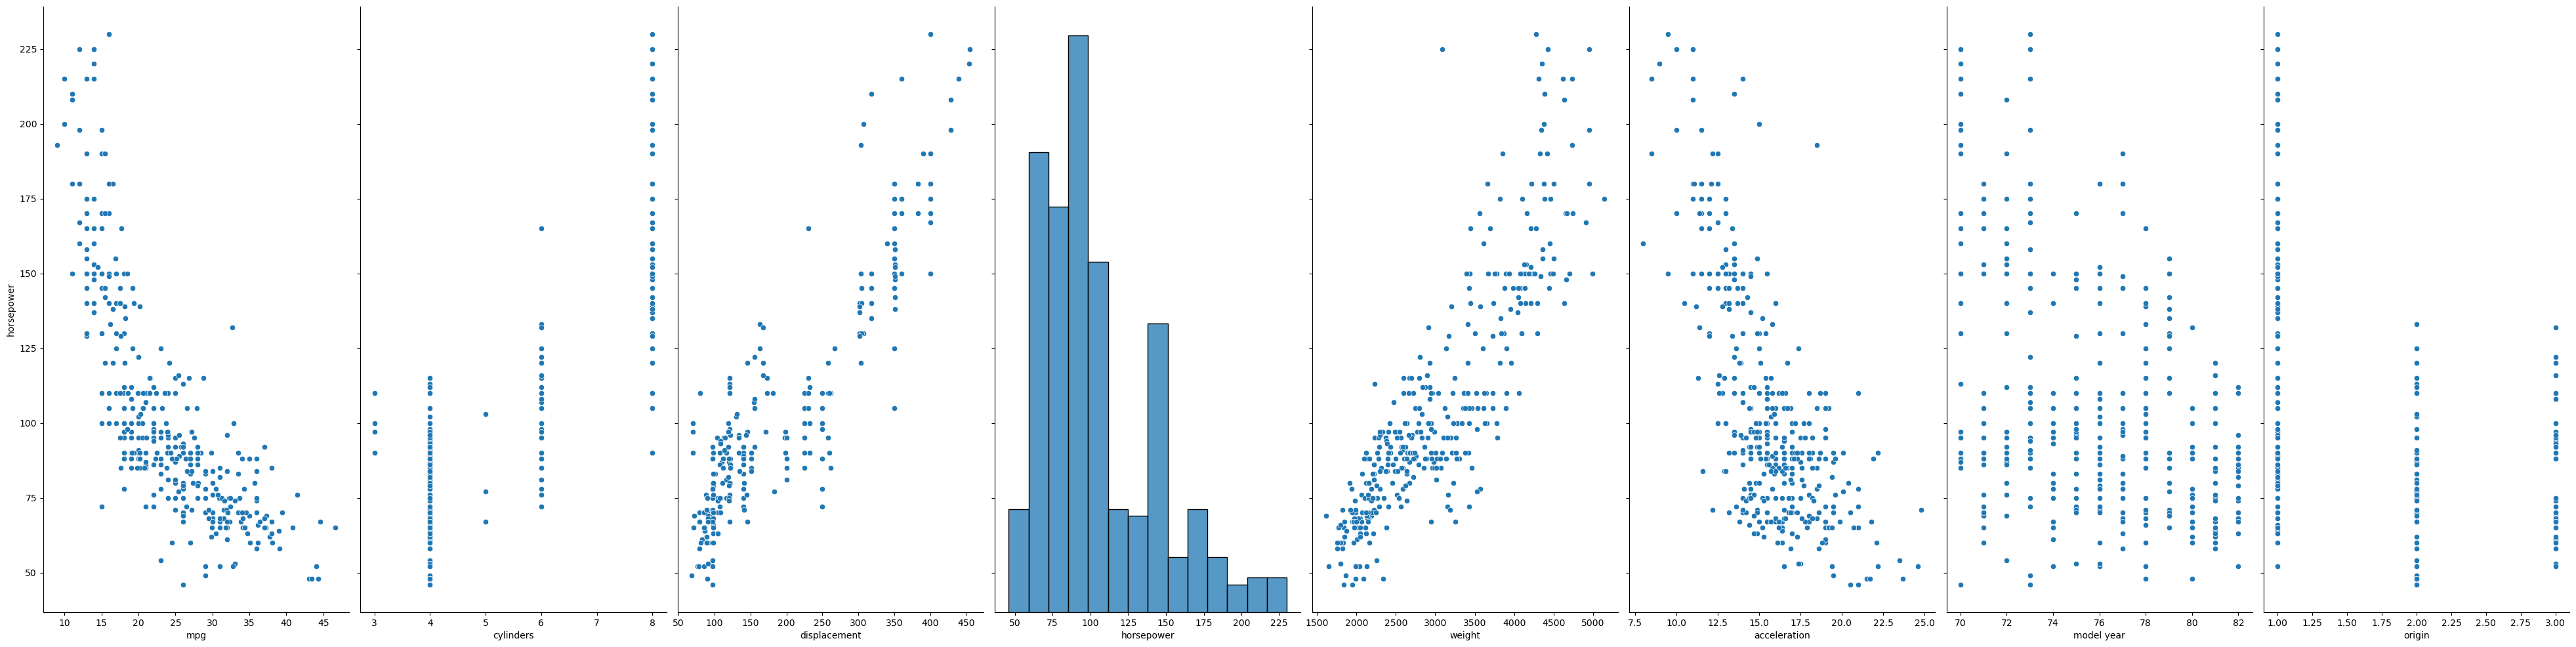

In [21]:
sns.pairplot(df_training,
             x_vars= ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'], 
             y_vars='horsepower', 
             height=10, 
             aspect=.5, 
             #kind='reg'
            );

#### 2. check for correlation

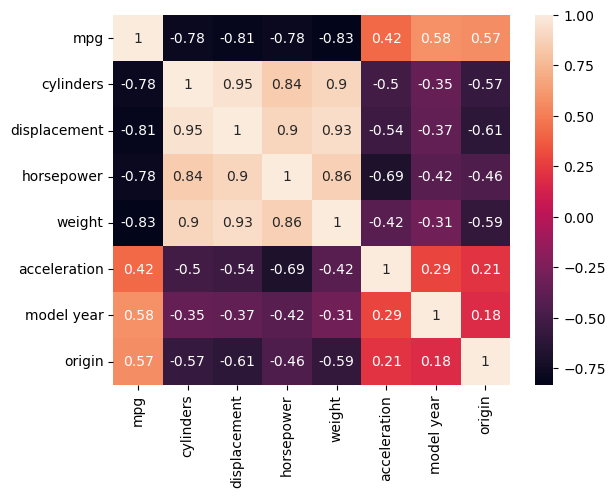

In [22]:
sns.heatmap(df_training.corr(), annot=True);

#### 3. build our ML model (regression)

In [23]:
# create a Python list of feature names
feature_cols = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']

# use the list to select a subset of the original DataFrame
X = df_training[feature_cols]

# select a Series from the DataFrame
y = df_training['horsepower']

- holdout method for evaluation

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [26]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(274, 7)
(274,)
(118, 7)
(118,)


- commission our ML model

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

the model
- horsepower =  b0
                b1 * mpg +
                b2 * cylinders +
                b3 * displacement +
                b4 * weight +
                b5 * acceleration +
                b6 * year +
                b7 * origin

In [29]:
model.intercept_                          # b0

138.8197040894417

In [30]:
model.coef_

array([-0.02194361, -1.89963587,  0.10272081,  0.02546489, -4.60956621,
       -0.70304887,  3.71276507])

#### Evaluation of the model

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn import metrics

In [33]:
# Model evaluation metrics for regression
# print('y-intercept             : ', linreg.intercept_)
# print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  9.059179446075056
Mean Sq  Error MSE      :  166.4816600229103
Root Mean Sq Error RMSE :  12.90277722131597
MAPE                    :  8.459086349592948
MPE                     :  -1.2773336247871707
r2 value                :  0.8942441825438735


#### 1. Mean-Absolute-Error(MAE)

- Calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. 

- Take the average of all these residuals. 

- Effectively, MAE describes the typical magnitude of the residuals. 

- The MAE is also the most intuitive of the metrics 

- Each residual contributes proportionally to the total amount of error, meaning that larger errors will contribute linearly to the overall error.

- A small MAE suggests the model is great at prediction, while a large MAE suggests that your model may have trouble in certain areas. 

- A MAE of 0 means that your model is a perfect predictor of the outputs (but this will almost never happen).


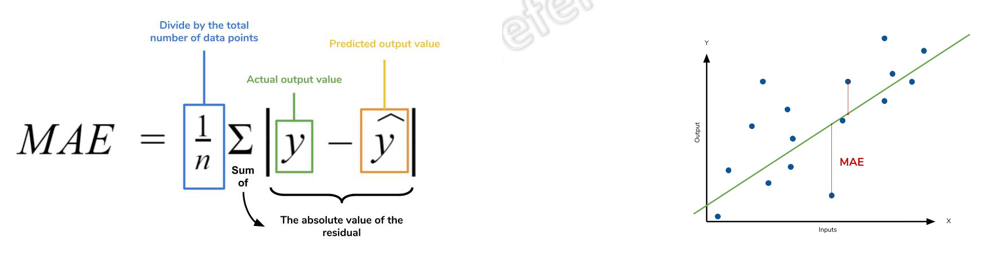

In [34]:
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))

Mean Abs Error   MAE    :  9.059179446075056


In [35]:
df_training.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### model saving & loading

In [36]:
import pickle

In [37]:
# save the model to disk
filename = 'finalized_model_auto_mpg.pkl'

pickle.dump(model, open(filename, 'wb'))

In [38]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [40]:
loaded_model.score(X_test, y_test)

0.8942441825438735